In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

In [2]:
spec_file = sorted(glob.glob("*grpspec.fits"))
spec = Spectrum(spec_file[0])


1 spectrum  in use
 
Spectral Data File: 0886090501_PN141grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.037e-02 +/- 1.891e-03 (33.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-19
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.01e+04 sec
 Using fit statistic: chi
 Using Background File                0886090501_PN141spec_bkg.fits
  Background Exposure Time: 1.01e+04 sec
 Using Response (RMF) File            0886090501_PN141spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886090501_PN141spec.arf



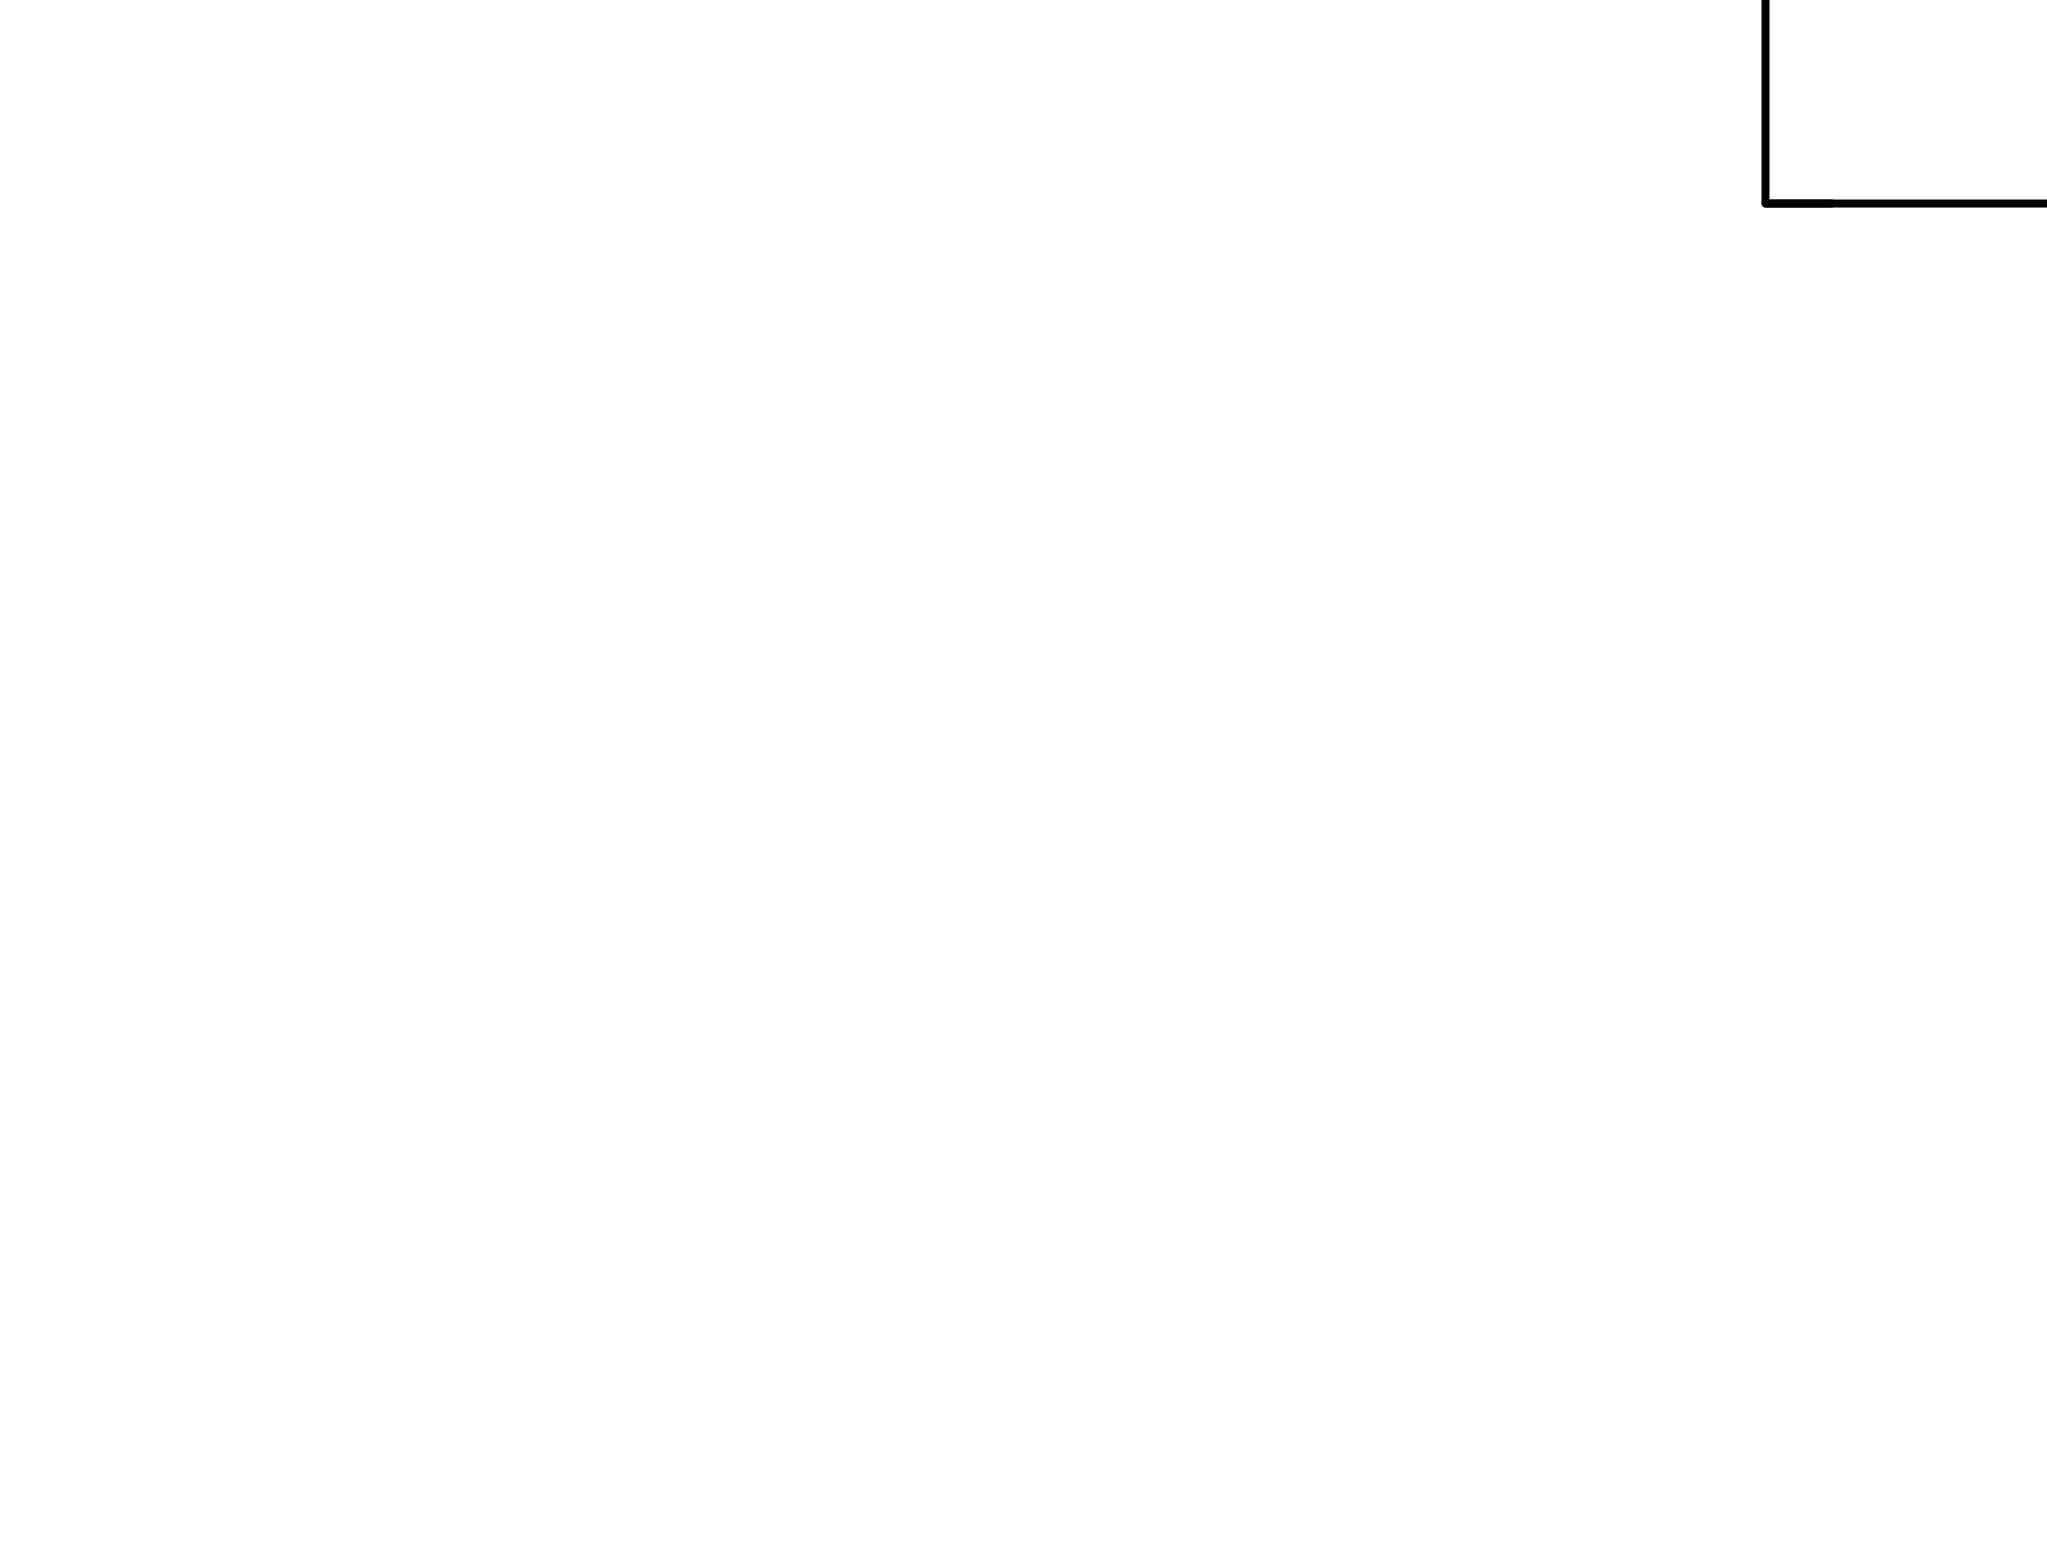

In [3]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              7.493928e+11     using 19 bins.

Te

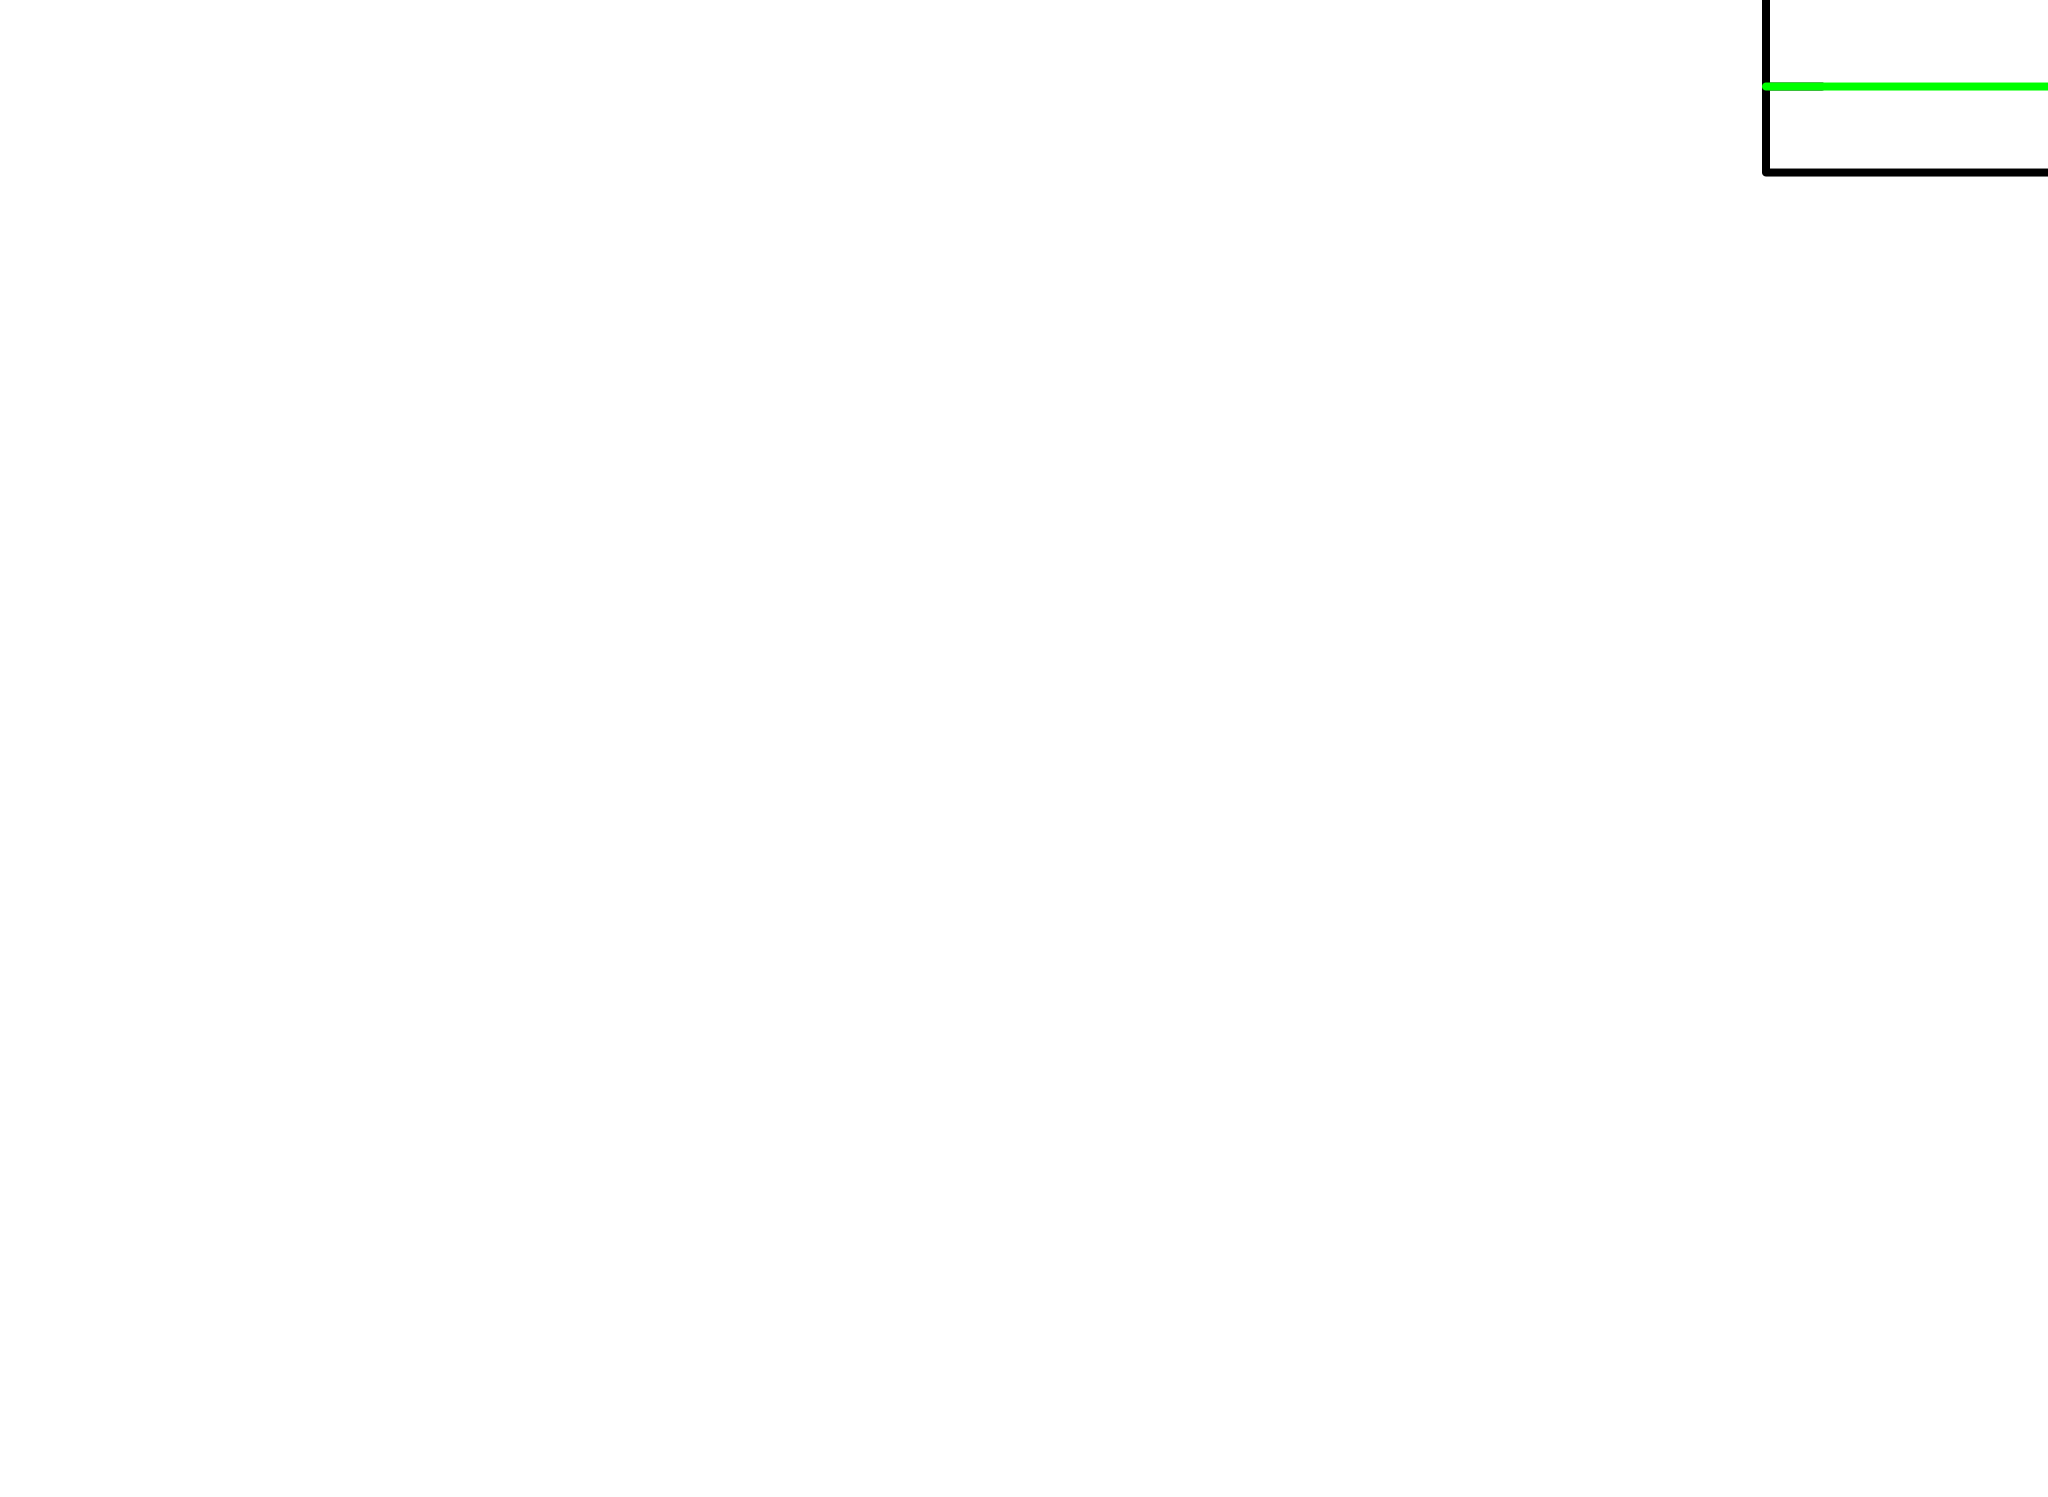

 Model Flux 8.4951e-06 photons (1.4264e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [4]:
#spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")
AllModels.calcFlux("0.2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.570266e+11     using 19 bins.

Test statistic : Chi-Squared              1.570266e+11     using 19 bins.
 Null hypothesis probability of 0.000000e+00 with 16 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
65.534       0.908091     -3      0.409712       2.88871   1.40602e-05
64.7085      19626.3      -1      0.271511       2.11193   9.89057e-06
63.8204      13920.6      -1      0.158300       1.85728   7.62630e-0

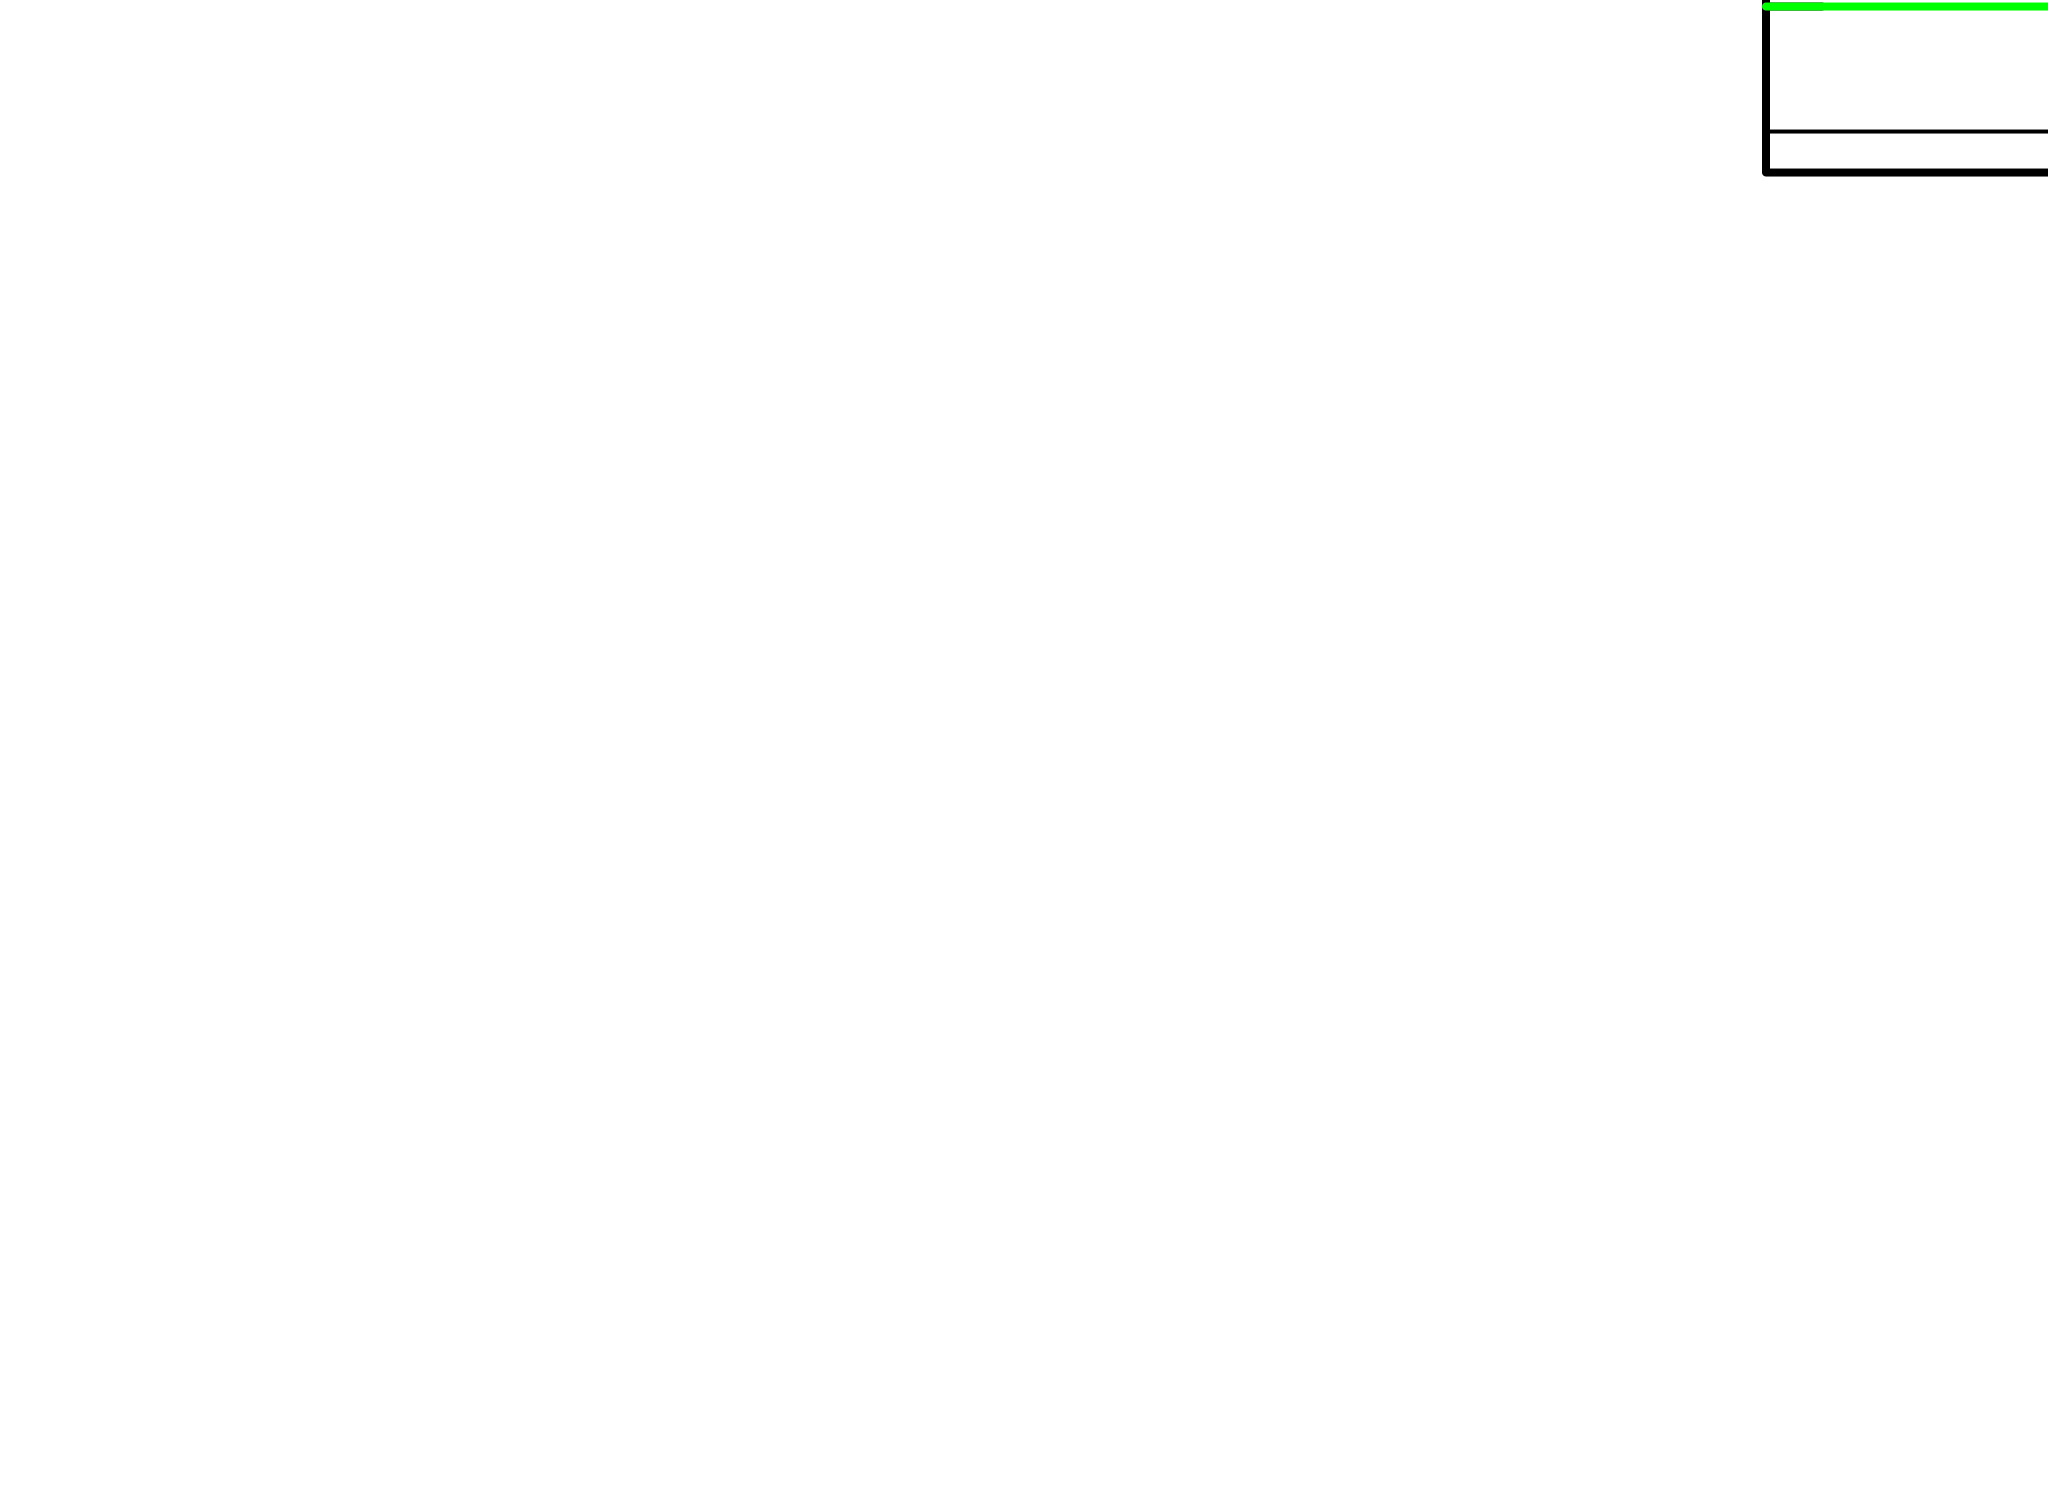

In [5]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.630876e+10     using 19 bins.

Test statistic : Chi-Squared              2.630876e+10     using 19 bins.
 Null hypothesis probability of 0.000000e+00 with 16 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
67.8783      0.549121      0      0.950467       5.85609   1.62689e-05
66.925       5327.58       0      0.688722       1.99241   1.65173e-05
65.1225      39963.7      -1      0.339329       2.62272   1.52220e-05


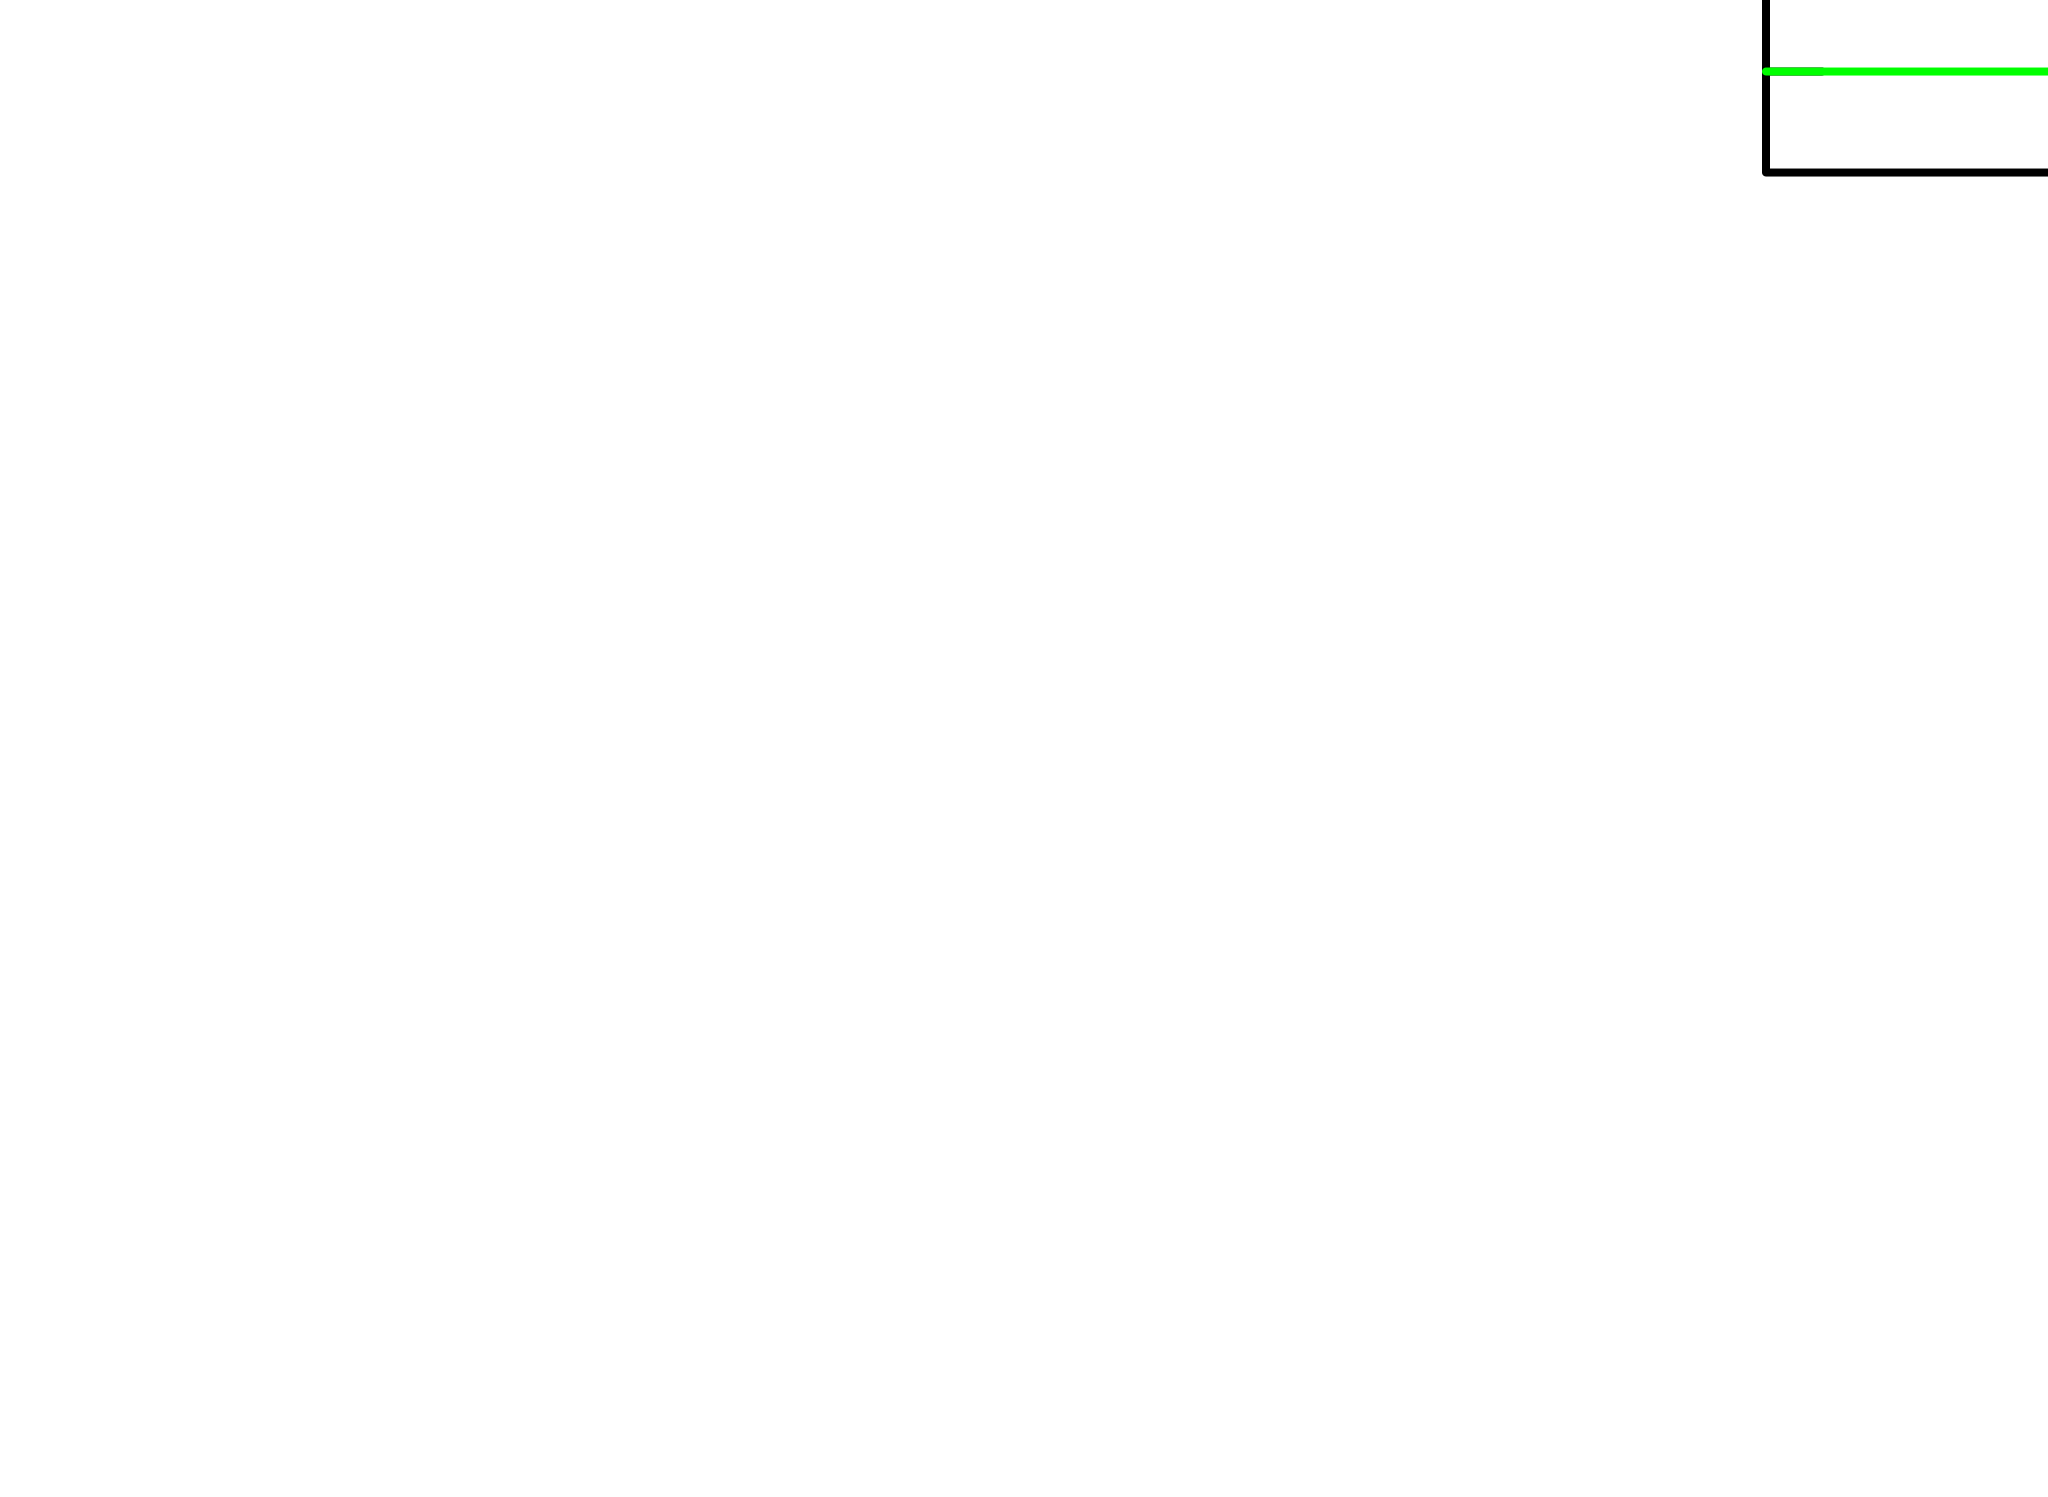

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              7.690078e+09     using 19 bins.

Test statistic : Chi-Squared              7.690078e+09     using 19 bins.
 Null hypothesis probability of 0.000000e+00 with 16 degrees of freedom
 Current data and model not fit yet.


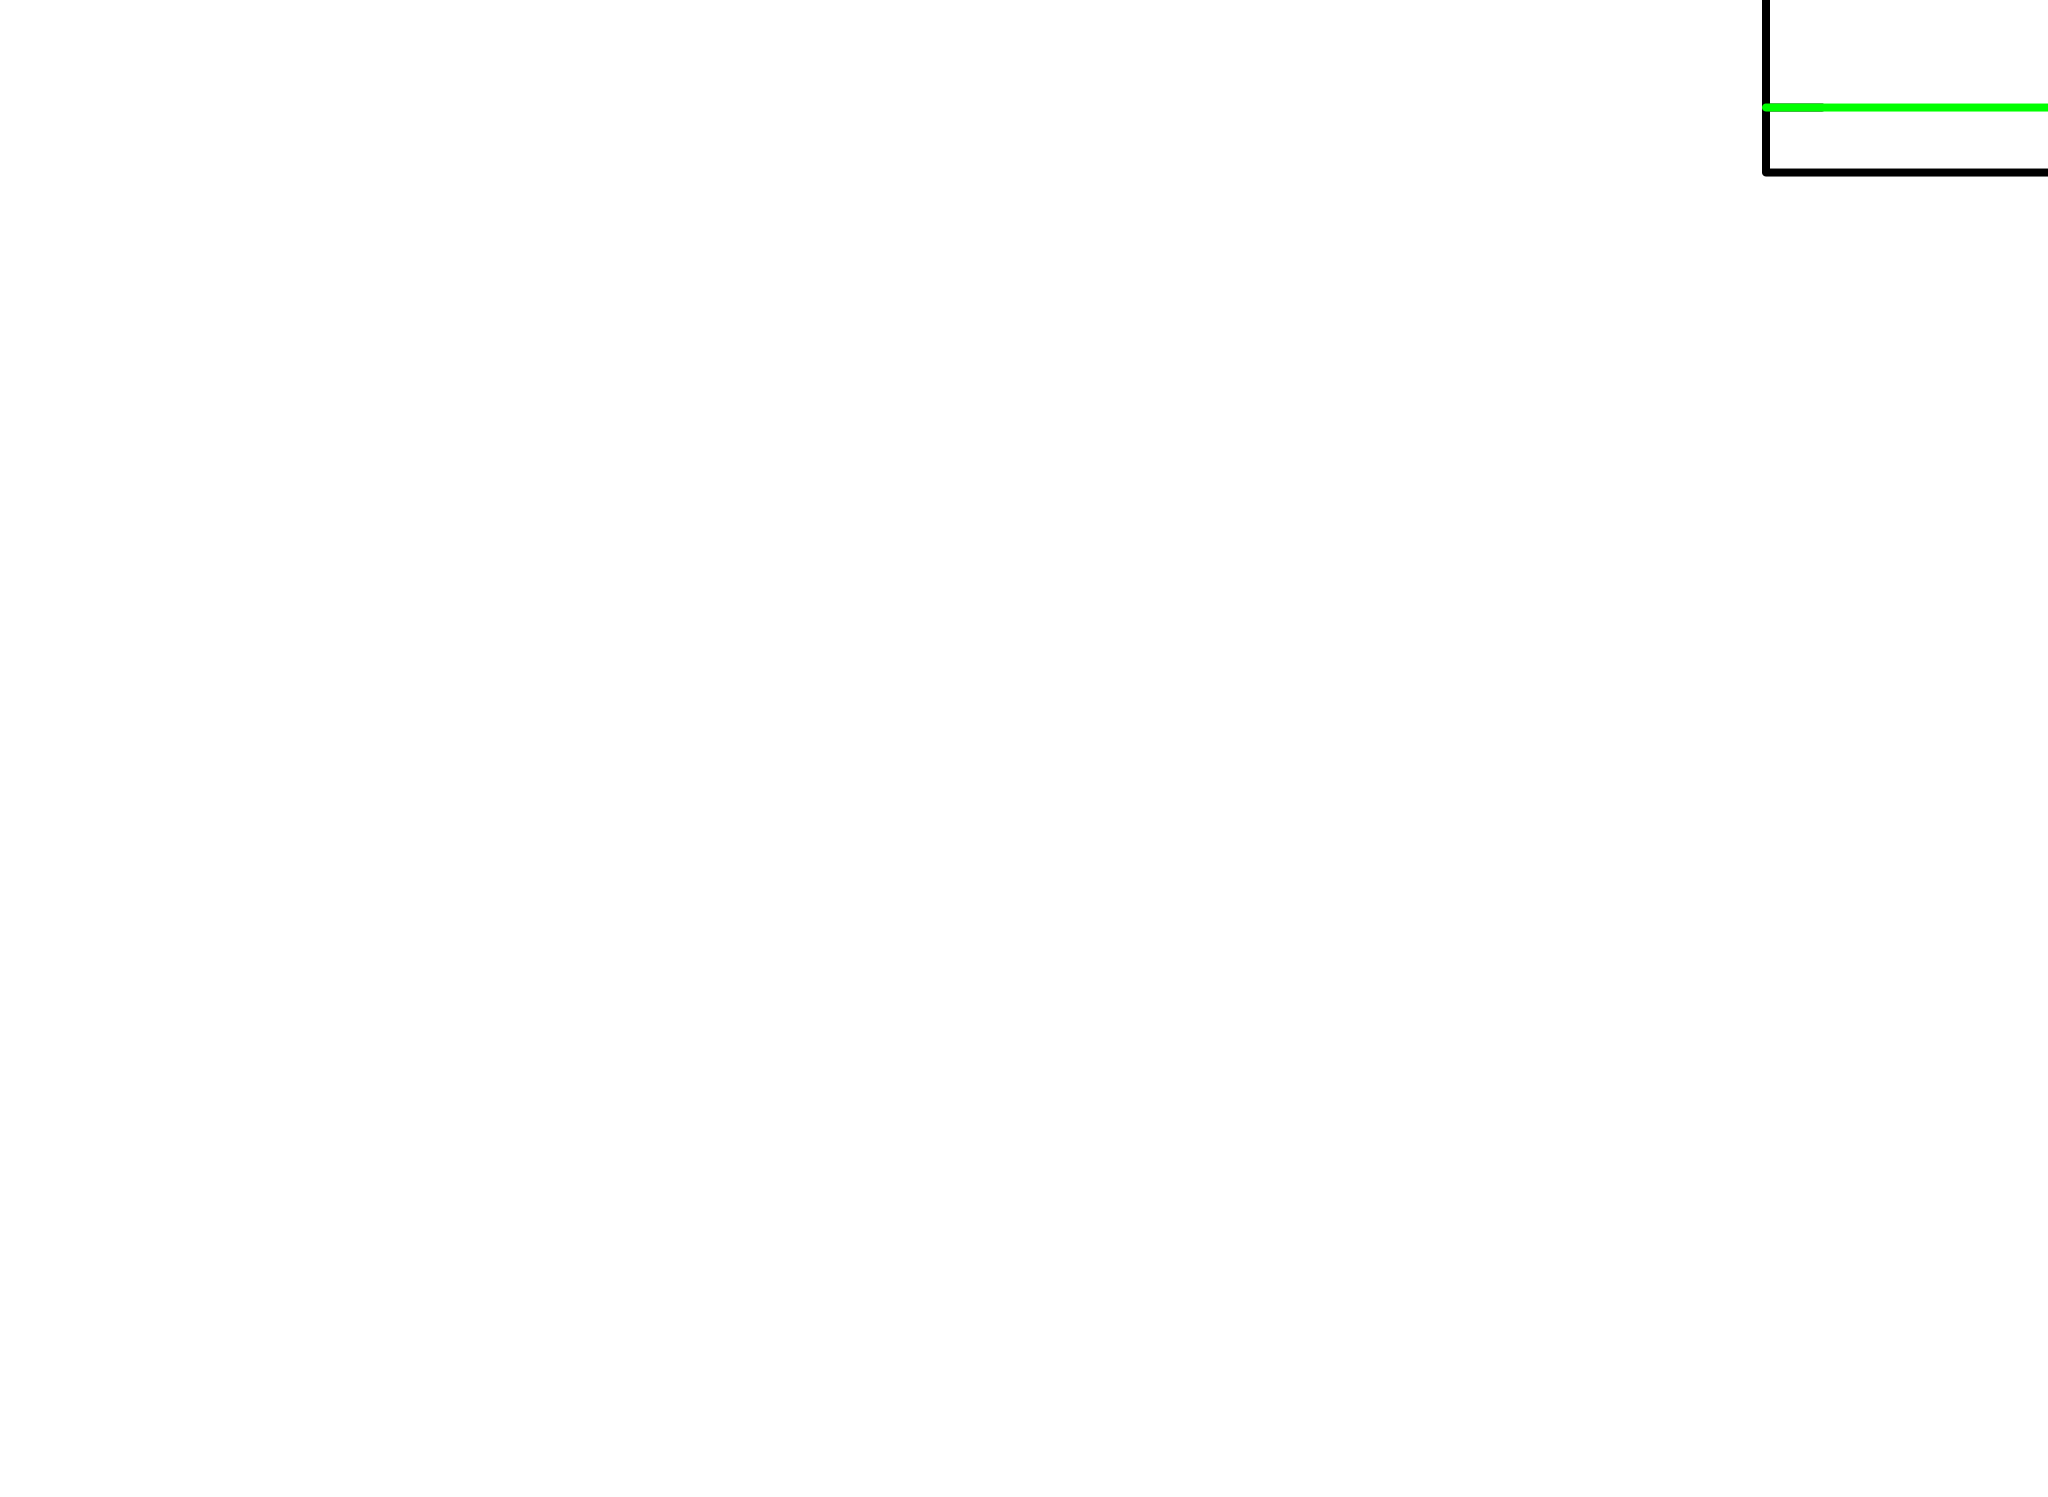

                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
67.649       0.707386     -2       1.53379      0.756890   6.19796e-05
66.8961      9765.9       -1       1.44942       1.09329   5.30038e-05
66.7088      6686.26       0       1.42962      0.997797   5.71803e-05
66.6526      4130.56      -1       1.48457      0.891503   6.86384e-05
66.6456      2231.17      -1       1.48816       1.02813   6.40194e-05
 Variances and Principal Axes
                 1        2        5  
 6.1173E-10| -0.0001   0.0001   1.0000  
 2.3750E-01| -0.9291  -0.3699  -0.0000  
 1.0539E+00|  0.3699  -0.9291   0.0001  
----------------------------------------

  Covariance Matrix
        1           2           3   
   3.492e-01  -2.806e-01   4.781e-05
  -2.806e-01   9.422e-01  -8.808e-05
   4.781e-05  -8.808e-05   1.060e-08
------------------------------------

Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit 

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.076128e+10     using 19 bins.

Test statistic : Chi-Squared              3.076128e+1

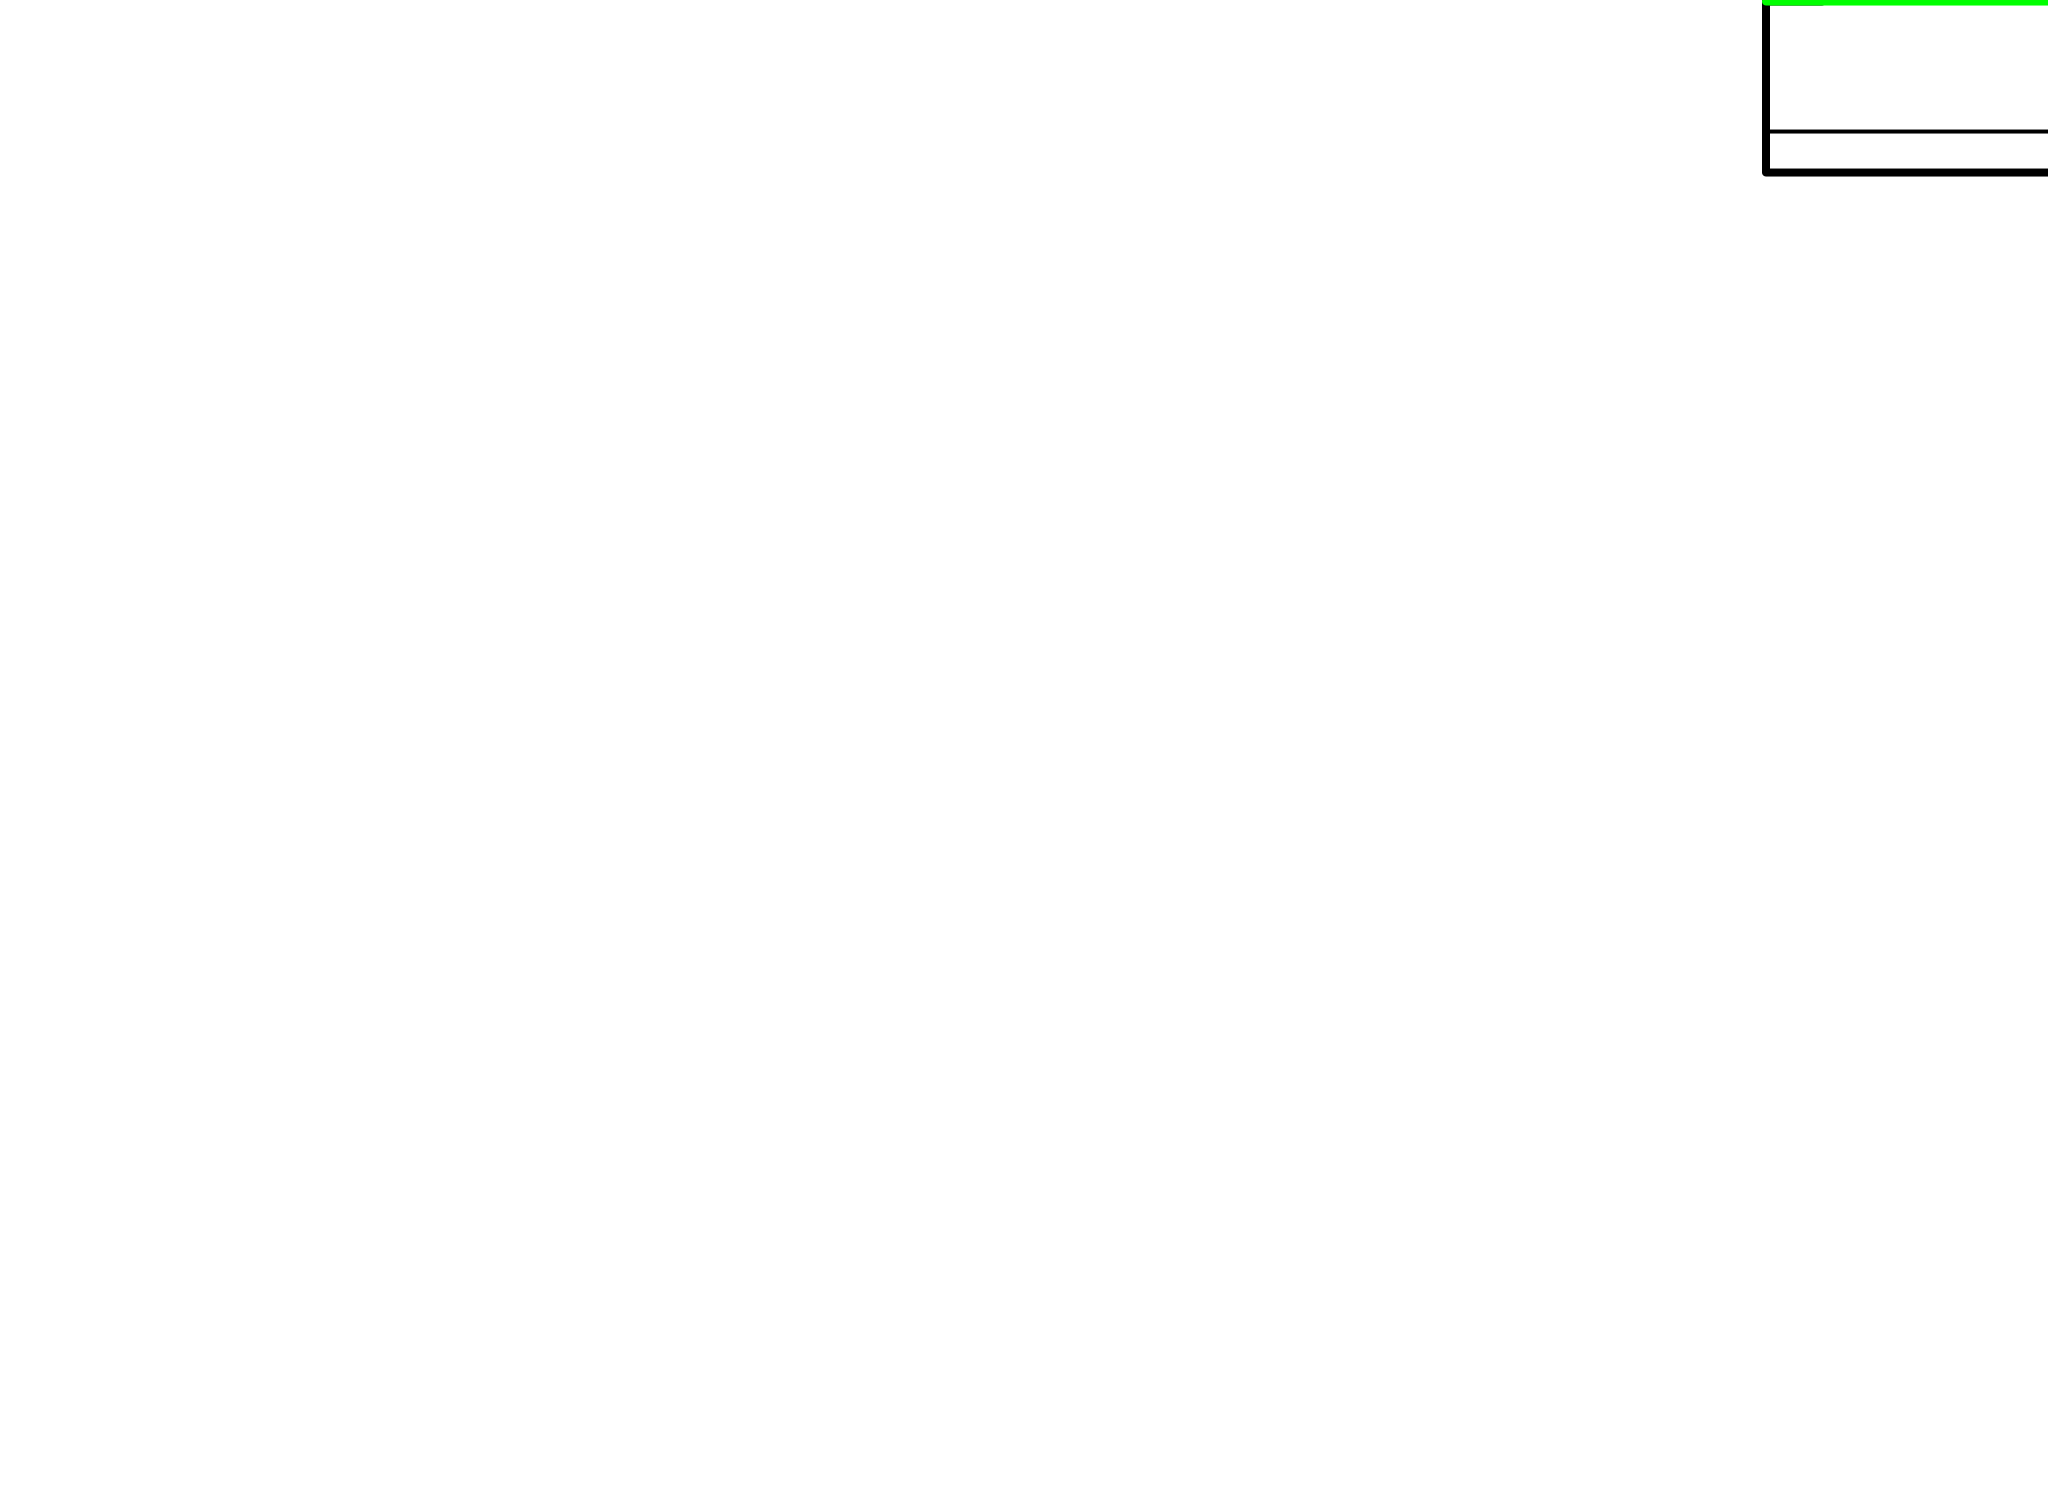

0     using 19 bins.
 Null hypothesis probability of 0.000000e+00 with 14 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              9.492674e+09     using 19 bins.

Test statistic : Chi-Squared              9.492674e+09     using 19 bins.
 Null hypothesis probability of 0.000000e+00 with 14 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              4.335111e+09     using 19 bins.

Test statistic : Chi-Squared              4.335111e+09     using 19 bins.
 Null hypothesis probability of 0.000000e+00 with 14 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm          6:kT        9:norm
66.4847      1906.77      -1      0.916214      0.211778   8.06403e-05       1.93319   4.09437e-05
65.954       2496.29      -1      0.820136      0.167597   0.000138337       2.60137   3.96992e-05
63.8983  

In [8]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.25
mo.apec_3.kT = 4.0
Fit.perform()
Plot("data resid")

In [9]:
AllModels.calcFlux(".2 12.0")

 Model Flux 5.311e-05 photons (6.2859e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [10]:
#plx = 0.6016
d_kpc = 8
F_x = 1.546*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.1835073146429443e+33


In [11]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.07317094642163


In [12]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.4480201905123674



Model TBabs<1>(bbody<2> + bremss<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   bremss     kT         keV      7.00000      +/-  0.0          
   5    3   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.620073e+11     using 19 bins.

Test statistic : Chi-Squared              9.620073e+11     using 19 bins.
 Null hypothesis probability of 0.000000e+00 with 14 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              4.688482e+10     using 19 bins.

Test statistic : Chi-Squared              4.688482e+10     using 19 bins.
 Null hypothesis p

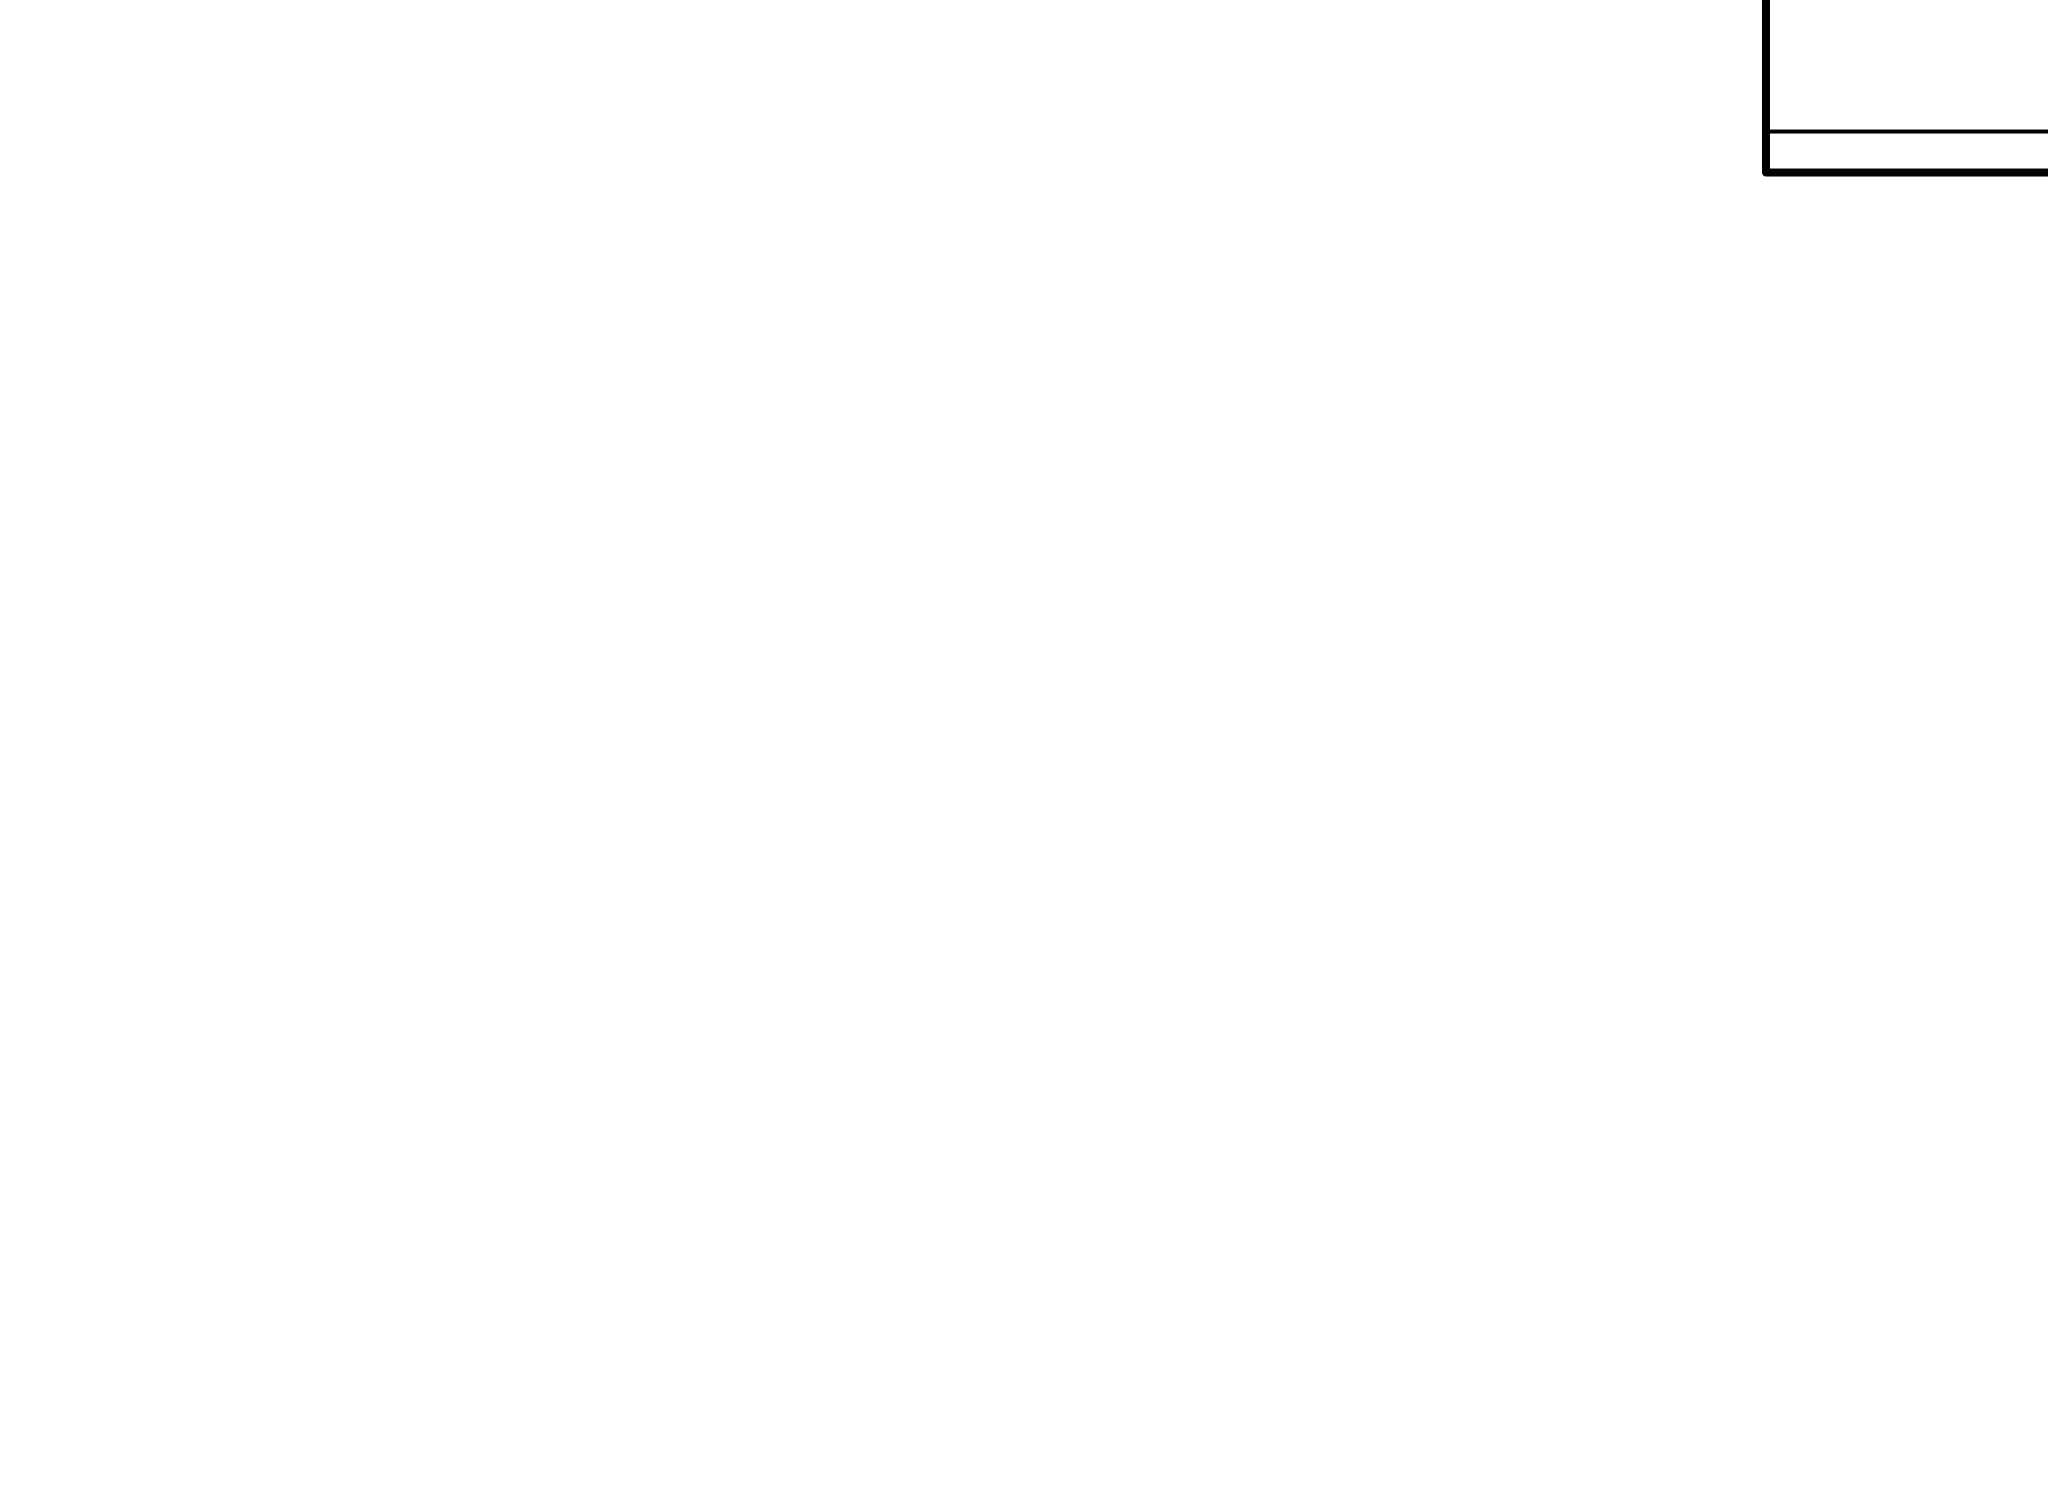

2172e-06
34.5747      234.001      -1     0.0771436     0.0238803   0.000244019       11.2319   7.22971e-06
34.5542      225.513      -1     0.0776935     0.0237974   0.000256147       11.1770   7.23779e-06
34.534       218.251      -1     0.0782392     0.0237157   0.000268780       11.1201   7.24564e-06
Number of trials exceeded: continue fitting? 34.5141      210.755      -1     0.0787806     0.0236352   0.000281936       11.0651   7.25351e-06
34.4944      204.237      -1     0.0793180     0.0235559   0.000295632       11.0086   7.26117e-06
34.475       197.631      -1     0.0798513     0.0234777   0.000309887       10.9534   7.26882e-06
34.4559      191.898      -1     0.0803806     0.0234007   0.000324721       10.8944   7.27612e-06
34.437       185.661      -1     0.0809060     0.0233248   0.000340153       10.8341   7.28321e-06
34.4183      180.197      -1     0.0814275     0.0232499   0.000356204       10.7700   7.28993e-06
34.3999      174.606      -1     0.0819454     0.023176

In [13]:
AllModels.clear()
mo = Model("tbabs*(bbody+bremss)")
mo.bbody.kT = 0.1
Fit.perform()
Plot("data resid")